In [1]:
from utils import *

import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
# mdw data
mdw_data = collect_data(airport_code="mdw")
mdw_data = average_by_hour(df=mdw_data)
mdw_data["HourRange"] = list(map(lambda x: int(x[0:2]) if int(x[0:2]) != 0 else 24, mdw_data["HourRange"])) 
print(mdw_data)
mdw_data = pd.melt(mdw_data, id_vars="HourRange")



mdw_data = mdw_data.sort_values(by=["variable", "HourRange"]).reset_index(drop=True)
mdw_data


    HourRange  TotalPassengerCount  AverageWait  BoothsUsed
0          24            13.000000     2.000000    1.000000
1           8            98.920000    12.380000    3.940000
2           9           220.730263    16.973684    4.065789
3          10           139.568421    16.410526    4.063158
4          11           124.333333    12.333333    4.252525
5          12           123.846154    13.115385    4.115385
6          13            88.428571    10.571429    2.714286
7          14           166.400000     5.500000    4.100000
8          15            64.210526     9.105263    3.526316
9          16           110.198473     6.488550    4.335878
10         17           145.828571     9.771429    4.028571
11         18           175.316832     6.445545    4.108911
12         19           265.685714    12.835714    4.107143
13         20           186.075949     9.683544    4.000000
14         21           160.140845    11.014085    3.943662
15         22            91.888889     5

,HourRange,variable,value
0,8,AverageWait,12.380000
1,9,AverageWait,16.973684
2,10,AverageWait,16.410526
3,11,AverageWait,12.333333
4,12,AverageWait,13.115385
5,13,AverageWait,10.571429
6,14,AverageWait,5.500000
7,15,AverageWait,9.105263
8,16,AverageWait,6.488550
9,17,AverageWait,9.771429


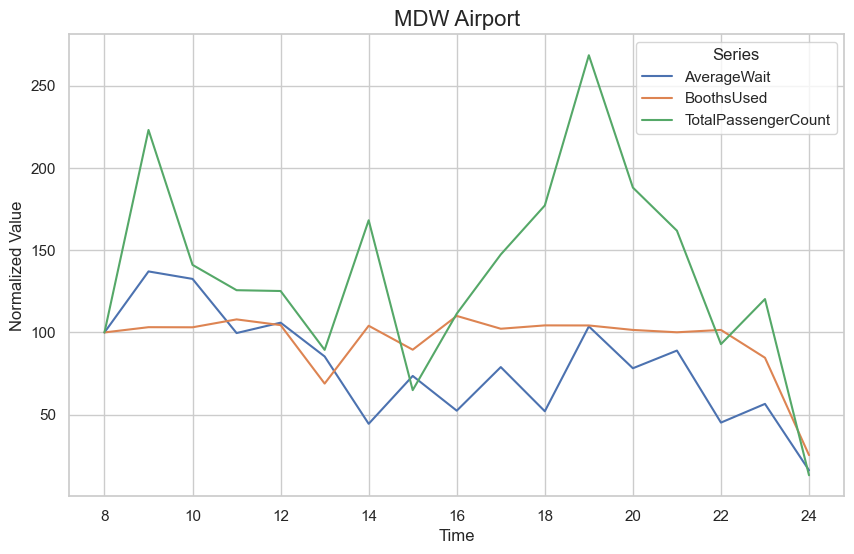

In [38]:
# normalized data
data_norm = []
for f in mdw_data["variable"].drop_duplicates():
    temp = mdw_data[mdw_data["variable"] == f].reset_index(drop=True)
    temp["value"] = 100*(temp["value"] / temp["value"][0])
    data_norm.append(temp)
data_norm = pd.concat(data_norm).reset_index(drop=True)

# Create the line plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_norm, x="HourRange", y="value", hue="variable")

# Customize the plot
plt.title("MDW Airport", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Normalized Value", fontsize=12)
plt.legend(title="Series")
plt.show()
